In [49]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.python.layers.core import Dense, Dropout


df=pd.read_csv('finalPCA.csv')

X=df.drop(['y'],axis=1)
y=df['y']


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train.shape:" ,x_train.shape)
print("y_train.shape:" ,y_train.shape)
print("x_test.shape:" ,x_test.shape)
print("y_test.shape:" ,y_test.shape)

x_train.shape: (36168, 18)
y_train.shape: (36168,)
x_test.shape: (9043, 18)
y_test.shape: (9043,)


In [50]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(18,)),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
])


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
r = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test, y_test), epochs=10, )

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7392 - loss: 373.9329 - val_accuracy: 0.8794 - val_loss: 1.3524
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7793 - loss: 3.6438 - val_accuracy: 0.8794 - val_loss: 0.4129
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7935 - loss: 1.5787 - val_accuracy: 0.8794 - val_loss: 1.2572
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8068 - loss: 1.3669 - val_accuracy: 0.8794 - val_loss: 0.4415
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8413 - loss: 0.5723 - val_accuracy: 0.8794 - val_loss: 0.3452
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8706 - loss: 0.4019 - val_accuracy: 0.8792 - val_loss: 0.3696
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8833 - loss: 0.3500 - val_accuracy: 0.8794 - val_loss: 0.3317
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8847 - loss: 0.3306 

In [53]:
model.evaluate(x_test, y_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8770 - loss: 0.3315


[0.3268124461174011, 0.8793541789054871]

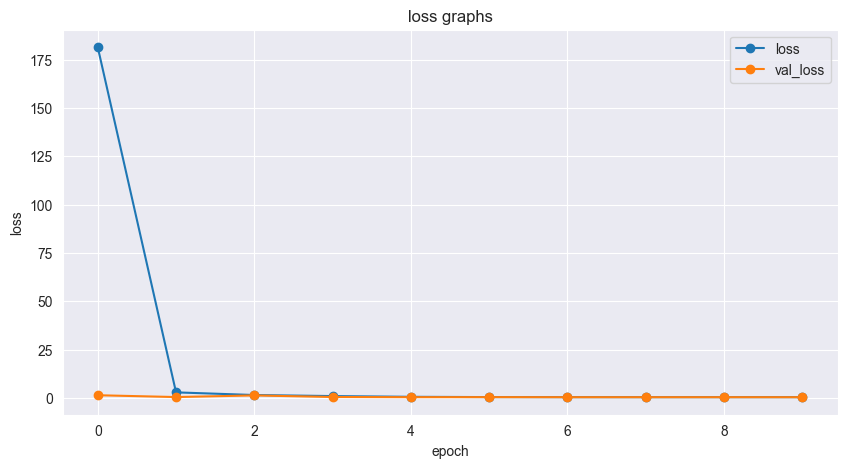

In [54]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(r.history['loss'], label='loss', marker='o')
plt.plot(r.history['val_loss'], label='val_loss',marker='o')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("loss graphs")
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Adjust for your output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_classifier = KerasClassifier(model=create_model, verbose=0)


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'model__dropout_rate': [0.0, 0.2, 0.5],
    'model__neurons': [16, 32, 64],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20]
}
grid = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Display the best parameters and their score
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


C:\Users\binar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The KerasClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'